# Data Summarization

## Basic Operations of Data Manipulations

You have learned several key operations that allow you to solve the vast majority of your data manipulation challenges:

* Pick observations by their values.
* Reorder the rows.
* Pick variables by their names.
* Create new variables with functions of existing variables.
* **Collapse many values down to a single summary.**

These can all be used in conjunction with groupby() which changes the scope of each function from operating on the entire dataset to operating on it group-by-group. 

In [1]:
import pandas as pd
import numpy as np 

In [2]:
from nycflights13 import flights
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z


## Data frame with columns

- year,month,day
        Date of departure    
- dep_time,arr_time
        Actual departure and arrival times (format HHMM or HMM), local tz.
- sched_dep_time,sched_arr_time
        Scheduled departure and arrival times (format HHMM or HMM), local tz.    
- dep_delay,arr_delay
        Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
- hour,minute
        Time of scheduled departure broken into hour and minutes.
- carrier
        Two letter carrier abbreviation. See airlines() to get name
- tailnum
        Plane tail number
- flight
        Flight number
- origin,dest
        Origin and destination. See airports() for additional metadata.
- air_time
        Amount of time spent in the air, in minutes
- distance
        Distance between airports, in miles
- time_hour
        Scheduled date and hour of the flight as a date. Along with origin, can be used to join flights data to weather data.

In [3]:
# Basic descriptive statistics for each column (or GroupBy)
flights.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [4]:
flights.describe(include='all')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776,336776.000000,334264,336776,336776,327346.000000,336776.000000,336776.000000,336776.000000,336776
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,4043,3,105,NaN,NaN,NaN,NaN,6936
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UA,NaN,N725MQ,EWR,ORD,NaN,NaN,NaN,NaN,2013-09-13T12:00:00Z
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58665,NaN,575,120835,17283,NaN,NaN,NaN,NaN,94
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,NaN,1971.923620,NaN,NaN,NaN,150.686460,1039.912604,13.180247,26.230100,NaN
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,NaN,1632.471938,NaN,NaN,NaN,93.688305,733.233033,4.661316,19.300846,NaN
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,NaN,1.000000,NaN,NaN,NaN,20.000000,17.000000,1.000000,0.000000,NaN
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,NaN,553.000000,NaN,NaN,NaN,82.000000,502.000000,9.000000,8.000000,NaN
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,NaN,1496.000000,NaN,NaN,NaN,129.000000,872.000000,13.000000,29.000000,NaN
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,NaN,3465.000000,NaN,NaN,NaN,192.000000,1389.000000,17.000000,44.000000,NaN


In [5]:
# Dimensions of the dataframe
flights.shape

(336776, 19)

In [6]:
# Number of rows in the dataframe
len(flights)

336776

In [7]:
# Number of distinct values in a column.
flights['carrier'].nunique()

16

In [8]:
# Count number of rows with each unique value of variable
flights['carrier'].value_counts()

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

## Summary functions

Pandas provides a large set of summary functions that operate on different kinds of pandas objects (DataFrame columns, Series, GroupBy, and produce single values for each of the groups. When applied to a DataFrame, the result is returned as a pandas Series for each column. Examples:
- ``sum()`` Sum values of each object.
- ``count()`` Count non-NA/null values of each object.
- ``median()`` Median value of each object.
- ``quantile([0.25,0.75])`` Quantiles of each object.
- ``min()`` Minimum value in each object.
- ``max()`` Maximum value in each object.
- ``mean()`` Mean value of each object.
- ``var()`` Variance of each object.
- ``std()`` Standard deviation of each object.
- ``apply(function)`` Apply function to each object.

These summary functions can be applied to all the rows in the dataframe. 

In [9]:
# Count the number of flights (rows)
flights['flight'].count()

336776

In [10]:
# Sum up the total distance of all flights. 
flights['distance'].sum()

350217607

In [11]:
# Average/mean of arrival delay
flights['arr_delay'].mean()

6.89537675731489

In [12]:
# Apply a function to multiple columns
flights[['distance','air_time']].max()

distance    4983.0
air_time     695.0
dtype: float64

## Group by

These summary functions are not terribly useful unless we pair them with groupby(). This changes the unit of analysis from the complete dataset to individual groups. Then, when you use a summary function on a grouped data frame they’ll be automatically applied “by group”. 

In [13]:
flights.groupby('carrier').size()

carrier
9E    18460
AA    32729
AS      714
B6    54635
DL    48110
EV    54173
F9      685
FL     3260
HA      342
MQ    26397
OO       32
UA    58665
US    20536
VX     5162
WN    12275
YV      601
dtype: int64

In [14]:
flights.groupby(['carrier','flight']).size()

carrier  flight
9E       2900      59
         2901      55
         2902      55
         2903      56
         2904      57
                   ..
YV       3778       3
         3788      23
         3790       9
         3791      15
         3799       1
Length: 5725, dtype: int64

In [5]:
flights.groupby(['year','month','day'])['arr_delay'].mean()

year  month  day
2013  1      1      12.651023
             2      12.692888
             3       5.733333
             4      -1.932819
             5      -1.525802
                      ...    
      12     27     -0.148803
             28     -3.259533
             29     18.763825
             30     10.057712
             31      6.212121
Name: arr_delay, Length: 365, dtype: float64

In [16]:
flights.groupby(['year','month'])['arr_delay'].agg(['mean','std','min','max'])

mean        std   min     max
year month                                    
2013 1       6.129972  40.423898 -70.0  1272.0
     2       5.613019  39.528619 -70.0   834.0
     3       5.807577  44.119192 -68.0   915.0
     4      11.176063  47.491151 -68.0   931.0
     5       3.521509  44.237613 -86.0   875.0
     6      16.481330  56.130866 -64.0  1127.0
     7      16.711307  57.117088 -66.0   989.0
     8       6.040652  42.595142 -68.0   490.0
     9      -4.018364  39.710309 -68.0  1007.0
     10     -0.167063  32.649858 -61.0   688.0
     11      0.461347  31.387406 -67.0   796.0
     12     14.870355  46.133110 -68.0   878.0

In [17]:
flights.groupby(['year','month'])['arr_delay'].agg(['mean','std','min','max'])

mean        std   min     max
year month                                    
2013 1       6.129972  40.423898 -70.0  1272.0
     2       5.613019  39.528619 -70.0   834.0
     3       5.807577  44.119192 -68.0   915.0
     4      11.176063  47.491151 -68.0   931.0
     5       3.521509  44.237613 -86.0   875.0
     6      16.481330  56.130866 -64.0  1127.0
     7      16.711307  57.117088 -66.0   989.0
     8       6.040652  42.595142 -68.0   490.0
     9      -4.018364  39.710309 -68.0  1007.0
     10     -0.167063  32.649858 -61.0   688.0
     11      0.461347  31.387406 -67.0   796.0
     12     14.870355  46.133110 -68.0   878.0

In [6]:
flights.groupby(['year','month'])['arr_delay'].agg(['mean','std','min','max']).reset_index()

,year,month,mean,std,min,max
0,2013,1,6.129972,40.423898,-70.0,1272.0
1,2013,2,5.613019,39.528619,-70.0,834.0
2,2013,3,5.807577,44.119192,-68.0,915.0
3,2013,4,11.176063,47.491151,-68.0,931.0
4,2013,5,3.521509,44.237613,-86.0,875.0
5,2013,6,16.481330,56.130866,-64.0,1127.0
6,2013,7,16.711307,57.117088,-66.0,989.0
7,2013,8,6.040652,42.595142,-68.0,490.0
8,2013,9,-4.018364,39.710309,-68.0,1007.0
9,2013,10,-0.167063,32.649858,-61.0,688.0


What if we want to apply different summary functions to different columns? 

In [7]:
flights.groupby('carrier').agg({'flight': 'size',
                                'distance': 'sum', 
                                'arr_delay': ['mean','std'],
                                'hour': lambda x: x.max()-x.min()
                               }).reset_index()

carrier flight  distance  arr_delay                hour
             size       sum       mean        std <lambda>
0       9E  18460   9788152   7.379669  50.086778       16
1       AA  32729  43864584   0.364291  42.516182       16
2       AS    714   1715028  -9.930889  36.482633       11
3       B6  54635  58384137   9.457973  42.842297       18
4       DL  48110  59507317   1.644341  44.402289       17
5       EV  54173  30498951  15.796431  49.861469       17
6       F9    685   1109700  21.920705  61.645997       10
7       FL   3260   2167344  20.115906  54.087671       14
8       HA    342   1704186  -6.915205  75.129420        1
9       MQ  26397  15033955  10.774733  43.174306       15
10      OO     32     16026  11.931034  48.584926        7
11      UA  58665  89705524   3.558011  40.984344       18
12      US  20536  11365778   2.129595  33.066952       20
13      VX   5162  12902327   1.764464  49.966450       13
14      WN  12275  12229203   9.649120  46.877702       15
15      YV    601    225395  15.556985  52.922234       14

In [3]:
# You can also create a function to include multiple aggregate functions on different columns. 
# In this way, you can give a name for each new column in the resulting dataframe. 
def f(x):
    d = {}
    d['flight_count'] = x['flight'].count()
    d['total_distance'] = x['distance'].sum()
    d['arr_delay_mean'] = x['arr_delay'].mean()
    d['arr_delay_std'] = x['arr_delay'].std()
    d['hour_range'] = x['hour'].max() - x['hour'].min()
    return pd.Series(d)

flights.groupby('carrier').apply(f)


,flightcount,total_distance,arr_delay_mean,arr_delay_std,hour_range
carrier,,,,,
9E,18460.0,9788152.0,7.379669,50.086778,16.0
AA,32729.0,43864584.0,0.364291,42.516182,16.0
AS,714.0,1715028.0,-9.930889,36.482633,11.0
B6,54635.0,58384137.0,9.457973,42.842297,18.0
DL,48110.0,59507317.0,1.644341,44.402289,17.0
EV,54173.0,30498951.0,15.796431,49.861469,17.0
F9,685.0,1109700.0,21.920705,61.645997,10.0
FL,3260.0,2167344.0,20.115906,54.087671,14.0
HA,342.0,1704186.0,-6.915205,75.129420,1.0


## Combining multiple operations

Now let's put multiple operators we've learned together. Imaging that we want to explore the relationship between the distance and average delay for each destination. 

There are four steps to prepare this data:
- Group flights by destination.
- Summarise to compute number of flights, average distance, and average arrival delay.
- Filter to remove noisy points and Honolulu airport (HNL), which is almost twice as far away as the next closest airport.
- Sort all rows by arrival delay.

In [20]:
dest_df = flights.groupby('dest').agg({'flight': 'size', 
                                       'distance': 'mean', 
                                       'arr_delay': 'mean'}).reset_index()
#dest_df
dest_no_hnl = dest_df[dest_df.dest!='HNL']
#dest_no_hnl
dest_sorted = dest_no_hnl.sort_values('arr_delay', ascending=False)
dest_sorted

,dest,flight,distance,arr_delay
18,CAE,116,603.551724,41.764151
101,TUL,315,1215.000000,33.659864
67,OKC,346,1325.000000,30.619048
46,JAC,25,1875.600000,28.095238
103,TYS,631,638.809826,24.069204
...,...,...,...,...
98,STT,522,1626.982759,-3.835907
95,SNA,825,2434.000000,-7.868227
77,PSP,19,2378.000000,-12.722222
50,LEX,1,604.000000,-22.000000


In [21]:
# Put everything in one line of code: 
flights.groupby('dest').agg(
    {'flight': 'size', 
     'distance': 'mean',
     'arr_delay': 'mean'}
).reset_index().query("dest!='HNL'").sort_values('arr_delay', ascending=False)

,dest,flight,distance,arr_delay
18,CAE,116,603.551724,41.764151
101,TUL,315,1215.000000,33.659864
67,OKC,346,1325.000000,30.619048
46,JAC,25,1875.600000,28.095238
103,TYS,631,638.809826,24.069204
...,...,...,...,...
98,STT,522,1626.982759,-3.835907
95,SNA,825,2434.000000,-7.868227
77,PSP,19,2378.000000,-12.722222
50,LEX,1,604.000000,-22.000000


In [10]:
# Assumption: flights that are not cancelled should have values for dep_delay and arr_delay. 

not_cancelled = flights[flights.dep_delay.notnull() & flights.arr_delay.notnull()] 
not_cancelled

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-10-01T02:00:00Z
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-10-01T02:00:00Z
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,2013-10-01T02:00:00Z
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-10-01T02:00:00Z


In [11]:
delays = not_cancelled.groupby('tailnum').agg({'arr_delay':'mean', 'flight':'count'}).reset_index()
delays

,tailnum,arr_delay,flight
0,D942DN,31.500000,4
1,N0EGMQ,9.982955,352
2,N10156,12.717241,145
3,N102UW,2.937500,48
4,N103US,-6.934783,46
...,...,...,...
4032,N997DL,4.903226,62
4033,N998AT,29.960000,25
4034,N998DL,16.394737,76
4035,N999DN,14.311475,61


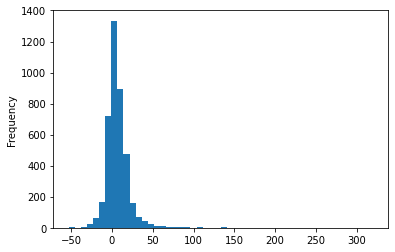

In [24]:
ax = delays['arr_delay'].plot.hist(bins=50)
# Wow, there are some planes that have an average delay of 5 hours (300 minutes)!

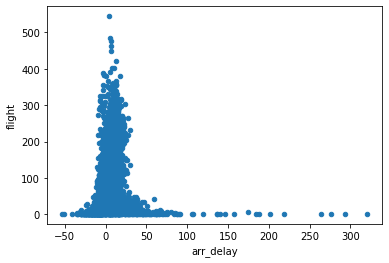

In [25]:
ax = delays.plot.scatter(x='arr_delay', y='flight')

Not surprisingly, there is much greater variation in the average delay when there are few flights. The shape of this plot is very characteristic: whenever you plot a mean (or other summary) vs. group size, you’ll see that the variation decreases as the sample size increases.

When looking at this sort of plot, it’s often useful to filter out the groups with the smallest numbers of observations, so you can see more of the pattern and less of the extreme variation in the smallest groups.

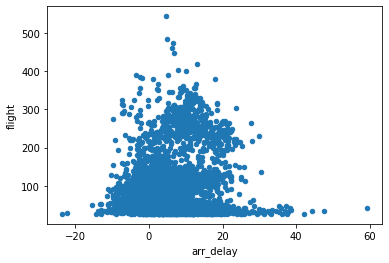

In [26]:
ax = delays.query('flight>25').plot.scatter(x='arr_delay', y='flight')

In [27]:
# How many flights left before 5am on each day? 
# (these usually indicate delayed flights from the previous day)
not_cancelled.query('dep_time<500').groupby(['year','month','day']).size()

year  month  day
2013  1      2      3
             3      4
             4      3
             5      3
             6      2
                   ..
      12     27     7
             28     2
             29     3
             30     6
             31     4
Length: 348, dtype: int64

## Operations within groups

Grouping is most useful in conjunction with aggregate functions. But you can also do other operations within groups:

In [13]:
# Find the worst members of each group:

# Find the top three flights with the longest arr_delay everyday. 
flights['rank_daily_delay'] = flights.groupby(['year', 'month', 'day'])['arr_delay'].rank(method='min',ascending=False)
flights[flights.rank_daily_delay<=3]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,rank_daily_delay
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01T23:00:00Z,1.0
649,2013,1,1,1815.0,1325,290.0,2120.0,1542,338.0,EV,4417,N17185,EWR,OMA,213.0,1134,13,25,2013-01-01T18:00:00Z,3.0
834,2013,1,1,2343.0,1724,379.0,314.0,1938,456.0,EV,4321,N21197,EWR,MCI,222.0,1092,17,24,2013-01-01T22:00:00Z,2.0
1310,2013,1,2,1412.0,838,334.0,1710.0,1147,323.0,UA,468,N474UA,EWR,MCO,150.0,937,8,38,2013-01-02T13:00:00Z,3.0
1440,2013,1,2,1607.0,1030,337.0,2003.0,1355,368.0,AA,179,N324AA,JFK,SFO,346.0,2586,10,30,2013-01-02T15:00:00Z,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335540,2013,9,29,1745.0,1330,255.0,2028.0,1632,236.0,B6,431,N517JB,LGA,SRQ,137.0,1047,13,30,2013-09-29T17:00:00Z,1.0
335778,2013,9,29,2327.0,1942,225.0,153.0,2250,183.0,B6,1271,N659JB,LGA,FLL,129.0,1076,19,42,2013-09-29T23:00:00Z,3.0
336252,2013,9,30,1324.0,830,294.0,1512.0,1040,272.0,EV,5157,N761ND,LGA,CLT,79.0,544,8,30,2013-09-30T12:00:00Z,1.0
336668,2013,9,30,1951.0,1649,182.0,2157.0,1903,174.0,EV,4294,N13988,EWR,SAV,95.0,708,16,49,2013-09-30T20:00:00Z,3.0


In [29]:
# Find all groups bigger than a threshold:

# Find all flights that fly to the popular destinations that appear in over 1000 times(flights). 
flights.groupby('dest').filter(lambda x: x['dest'].count()>1000)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,rank_daily_delay
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,288.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,198.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,122.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,791.0
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01T10:00:00Z,271.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z,NaN
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z,NaN
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z,NaN
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z,NaN


In [30]:
# Standardise to compute per group metrics:

# For all flights that arrived later than scheduled, 
# calculate the proportion of arrival delay among delayed flights to the each destination
# display year, month, day, destination, flight, arr_delay, and proportion of arr_delay
flights['prop_delay'] = flights[flights.arr_delay>0].groupby('dest')['arr_delay'].transform(lambda x: x / x.sum())
flights[flights.arr_delay>0][['year', 'month', 'day', 'dest', 'flight', 'arr_delay', 'prop_delay']]    

,year,month,day,dest,flight,arr_delay,prop_delay
0,2013,1,1,IAH,1545,11.0,0.000111
1,2013,1,1,IAH,1714,20.0,0.000201
2,2013,1,1,MIA,1141,33.0,0.000235
5,2013,1,1,ORD,1696,12.0,0.000042
6,2013,1,1,FLL,507,19.0,0.000094
...,...,...,...,...,...,...,...
336759,2013,9,30,BNA,3660,7.0,0.000057
336760,2013,9,30,STL,4672,57.0,0.000717
336762,2013,9,30,SFO,471,42.0,0.000204
336763,2013,9,30,MCO,1083,130.0,0.000631
